# Task 1: Data Preparation

Let’s move to MNIST, a benchmark dataset of handwritten digits, that has approximately 70,000 example images from 10 classes. Each 2-dimentional image is of size ‘28 × 28’, and belongs to one of the categories ‘0-9’.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1a: $N$-alternating points problem

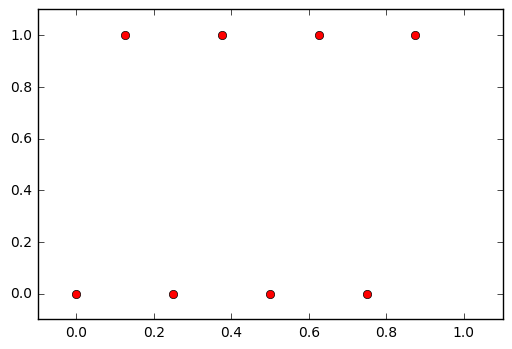

In [2]:
N = 3
x = np.linspace(0, 1-2**(-N), num=2**N)
y = np.empty((2**N,))
y[::2] = 0  # even entries are 0
y[1::2] = 1 # odd entries are 1

plt.plot(x,y, 'ro')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.show()

### Task 1b: XOR problem
https://en.wikipedia.org/wiki/XOR_gate

Page 166 of Deep Learning book by Goodfellow et al.

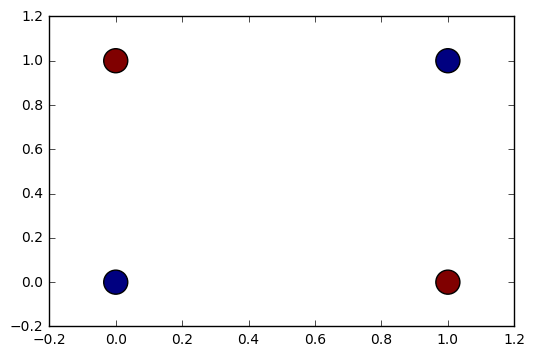

In [3]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],[1],[1],[0]])
plt.scatter(X[:,0],X[:,1], s = 300, c = y)
plt.show()

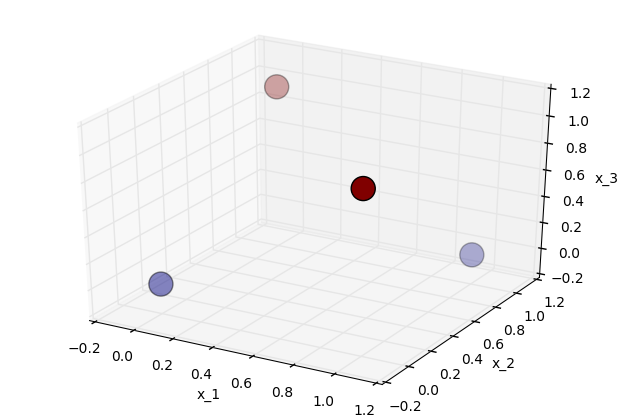

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x3 = [0, 1, 1, 0]
ax.scatter(X[:,0], X[:,1], x3,  s = 300, c = y)
#ax.scatter(X[:,0], X[:,1], x3,  s = 300, c = y)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
plt.show()

### Task 1c: MNIST
http://yann.lecun.com/exdb/mnist/

In [5]:
from torchvision import datasets
data = datasets.MNIST('data', train=True, download=True)
X_numpy = data.train_data.numpy()/255
y_numpy = data.train_labels.numpy()
print(X_numpy.shape, y_numpy.shape)

(60000, 28, 28) (60000,)


In [6]:
def draw_MNIST(image, label = ''):
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.show()

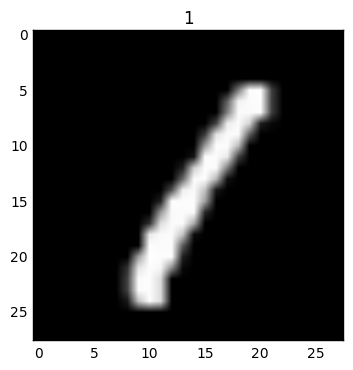

In [7]:
img_ind = 3
draw_MNIST(X_numpy[img_ind], y_numpy[img_ind])

### One-hot encoding

In [8]:
def onehot(integer_labels):
    #Return matrix whose rows are onehot encodings of integers.
    onehotL = np.zeros((len(integer_labels), len(np.unique(integer_labels))), dtype='uint8')
    onehotL[np.arange(len(integer_labels)), integer_labels] = 1
    return onehotL

y_numpy_onehot = onehot(y_numpy)
print(y_numpy_onehot.shape)

(60000, 10)


In [9]:
ind = 2
print(y_numpy[ind])
print(y_numpy_onehot[ind,:])

4
[0 0 0 0 1 0 0 0 0 0]


In [10]:
X_numpy_vec = X_numpy.reshape(60000,-1)

# Problem 2.iii (Split)
N_train = 40000
train_img = X_numpy_vec[0:N_train,]
train_label = y_numpy_onehot[0:N_train,]
print(train_img.shape, train_label.shape)

test_img = X_numpy_vec[N_train:,]
test_label = y_numpy_onehot[N_train:]
print(test_img.shape, test_label.shape)

(40000, 784) (40000, 10)
(20000, 784) (20000, 10)


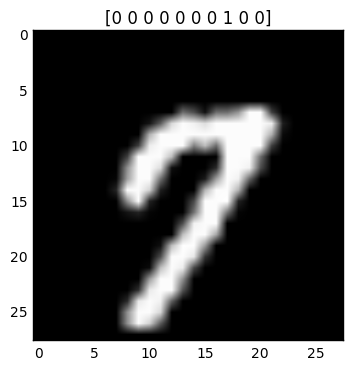

In [11]:
# Test whether drawin the image still works
draw_MNIST(test_img[1,].reshape((28,28)), test_label[1])

In [12]:
# Problem 2.iv
batch_size = 4
def mbatch_MNIST(img, label, ind):
    sample_img = img[ind,]
    sample_label = label[ind,]
    return (sample_img, sample_label)

ind = np.random.permutation(train_label.shape[0]).reshape(-1,batch_size)

(4, 784) (4, 10)


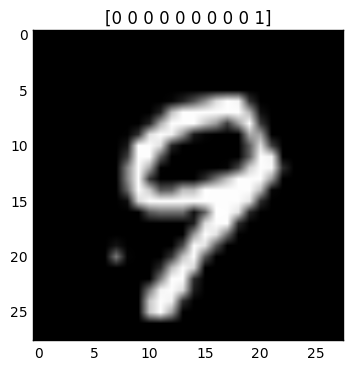

In [13]:
batch_number = 2
sample_number = 3
sample_img, sample_label = mbatch_MNIST(train_img, train_label, ind[batch_number])
print(sample_img.shape, sample_label.shape)
draw_MNIST(sample_img[sample_number,].reshape((28,28)), sample_label[sample_number,])

(100, 1, 28, 28)


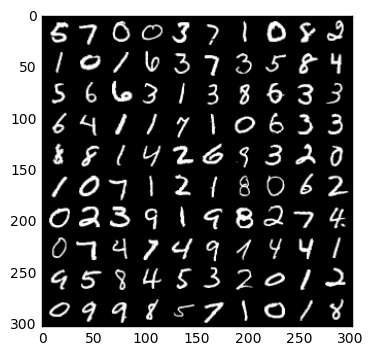

In [14]:
import torch
from torchvision.utils import make_grid
examples = X_numpy[np.random.choice(range(60000),100),:,:][:,None,:,:]
print(examples.shape)
plt.imshow(make_grid(torch.FloatTensor(examples), nrow=10).permute(1,2,0))